## MO444 Project 3 - Reinforcement Learning

* Rodrigo Araújo Marinho Franco - RA: 233569
* Felipe Marinho Tavares - RA: 265680

### Contributions:
* Rodrigo
 * ...
* Felipe
 * ...

# PART I - Evolutionary Model

# PART II - Reinforcement Learning

In [1]:
import sys
sys.path.append("search/")

import torch
import matplotlib.pyplot as plt

import environment

In [2]:
def dqn(layout, params, n_episodes=25000, print_every=100, patience=1500):
    env = environment.Environment(params, layout=layout, use_features=True)
    checkpoint_filename = "checkpoint_{:}.pth".format(layout)

    checkpoints_without_improvement = 0

    best_score = {
        "episode_number": -1,
        "average_score": -1000.0,
        "average_reward": 0.0,
        "average_num_actions": 0,
        "average_num_foods_eaten": 0,
        "winrate": 0.0
    }

    print("Starting agent training...")
    for i_episode in range(1, n_episodes + 1):
        env.reset()

        while not env.done():
            env.step()

        average_score, average_reward, average_foods_eaten, average_num_actions, winrate = env.compute_scores()

        if average_score > best_score["average_score"]:
            checkpoints_without_improvement = 0
            best_score["episode_number"] = i_episode
            best_score["average_score"] = average_score
            best_score["average_reward"] = average_reward
            best_score["average_num_actions"] = average_num_actions
            best_score["average_num_foods_eaten"] = average_foods_eaten
            best_score["winrate"] = winrate

            torch.save(env.pacman.qnetwork_local.state_dict(), 'models/{:}'.format(checkpoint_filename))
        else:
            checkpoints_without_improvement += 1
            if checkpoints_without_improvement == patience:
                print("Stopping training due to lack of improvements")
                break

        if i_episode == 1 or i_episode % print_every == 0:
            print("Episode: ", i_episode, end=" ")
            print('Average Score: {:.2f}'.format(average_score), end=" ")
            print('Average Reward: {:.2f}'.format(average_reward), end=" ")
            print('Average Number of actions: {:.2f}'.format(average_num_actions), end=" ")
            print('Average Foods eaten: {:.2f}/{:}'.format(average_foods_eaten, env.layout.totalFood), end=" ")
            print('Winrate: {:.2f}%'.format(winrate))
    print("Training done!")
    print()
    print("Metrics from the episode with the best score:")
    print(best_score)

    return env

def plot_training_data(env):
    plt.figure(figsize=(10, 5))
    plt.title("Scores per episode")
    plt.xlabel('Episode')
    plt.ylabel('Average Score (from the game)')
    line1, = plt.plot(env.average_scores)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.title("Number of actions per game")
    plt.xlabel('Episode')
    plt.ylabel('Number of actions')
    line1, = plt.plot(env.average_num_actions)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.title("Number of foods eaten per game")
    plt.xlabel('Episode')
    plt.ylabel('Number of foods eaten')
    line1, = plt.plot(env.average_foods_eaten)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.title("Wins during training")
    plt.xlabel('Episode')
    plt.ylabel('Winrate (Percentage)')
    line1, = plt.plot(env.average_wins)
    plt.show()

In [3]:
params = {
    "buffer_size": int(5e5),  # replay buffer size
    "batch_size": 32,         # minibatch size
    "gamma": 0.99,            # discount factor
    "tau": 1e-3,              # for soft update of target parameters
    "lr": 1e-3,               # learning rate
    "update_every": 10        # how often to update the network
}

n_episodes = 50000 # Maximum number of episodes to train the agent
print_every = 100  # episodes
patience = 1500    # Max number episodes without a improvement tolerated

## SmallClassic Environment - Training

Initial state of the environment looks like:


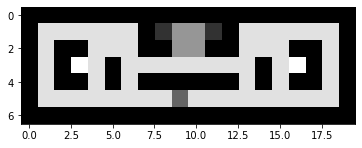

Layout Height:  7
Layout Width:  20
Episode:  1 Average Score: -467.00 Average Reward: -2.00 Average Number of actions: 107.00 Average Foods eaten: 14.00/55 Winrate: 0.00%
Episode:  100 Average Score: -398.47 Average Reward: 64.59 Average Number of actions: 41.07 Average Foods eaten: 14.06/55 Winrate: 0.00%

Metrics from the episode with the best score:
{'episode_number': 12, 'average_score': -380.75, 'average_reward': 84.41666666666667, 'average_num_actions': 40.75, 'average_num_foods_eaten': 15.833333333333334, 'winrate': 0.0}


In [4]:
layout = "smallClassic"
env = dqn(layout, params, n_episodes, print_every, patience)

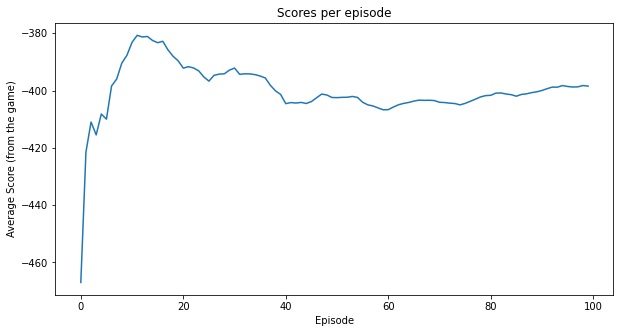

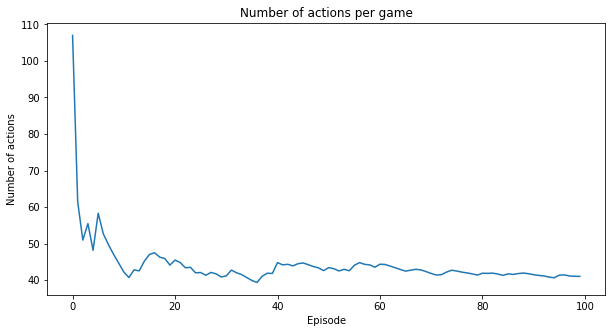

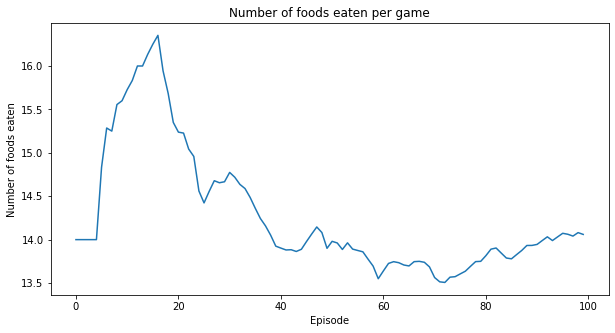

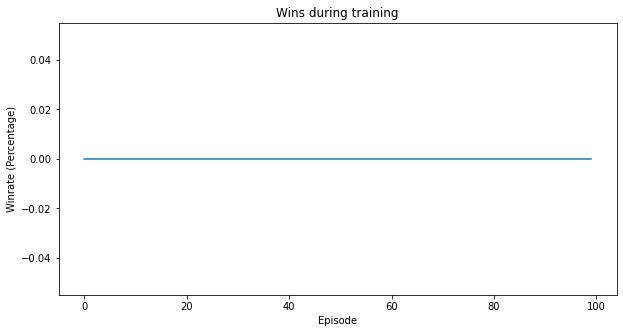

In [5]:
plot_training_data(env)

## MediumClassic Environment - Training

Initial state of the environment looks like:


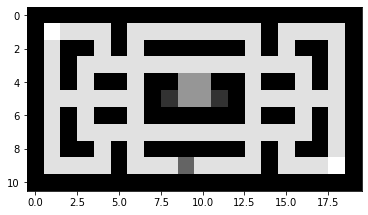

Layout Height:  11
Layout Width:  20
Episode:  1 Average Score: -742.00 Average Reward: -218.00 Average Number of actions: 462.00 Average Foods eaten: 22.00/97 Winrate: 0.00%
Episode:  100 Average Score: -58.44 Average Reward: 365.04 Average Number of actions: 117.94 Average Foods eaten: 40.81/97 Winrate: 0.00%

Metrics from the episode with the best score:
{'episode_number': 100, 'average_score': -58.44, 'average_reward': 365.04, 'average_num_actions': 117.94, 'average_num_foods_eaten': 40.81, 'winrate': 0.0}


In [6]:
layout = "mediumClassic"
env = dqn(layout, params, n_episodes, print_every, patience)

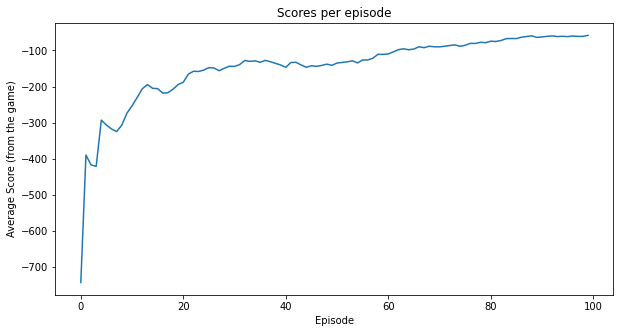

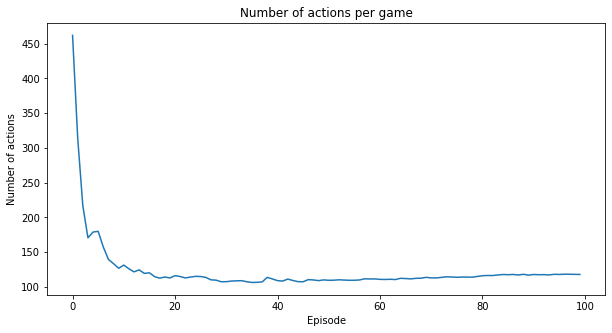

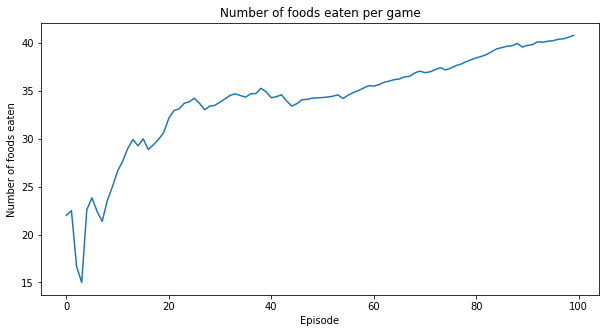

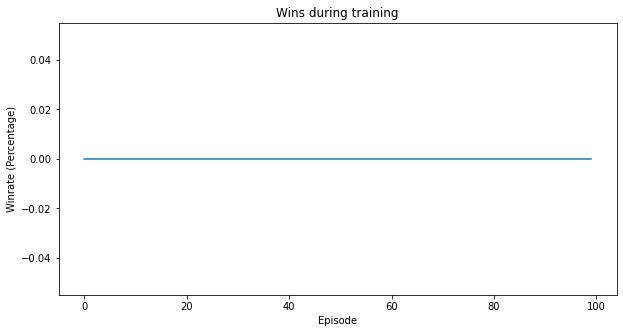

In [7]:
plot_training_data(env)

## OriginalClassic Environment - Training

Initial state of the environment looks like:


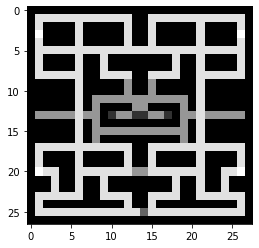

Layout Height:  27
Layout Width:  28
Episode:  1 Average Score: -440.00 Average Reward: 25.00 Average Number of actions: 80.00 Average Foods eaten: 14.00/229 Winrate: 0.00%
Episode:  100 Average Score: -179.92 Average Reward: 292.99 Average Number of actions: 135.92 Average Foods eaten: 40.99/229 Winrate: 0.00%

Metrics from the episode with the best score:
{'episode_number': 95, 'average_score': -172.81052631578947, 'average_reward': 297.90526315789475, 'average_num_actions': 134.2842105263158, 'average_num_foods_eaten': 41.305263157894736, 'winrate': 0.0}


In [8]:
layout = "originalClassic"
env = dqn(layout, params, n_episodes, print_every, patience)

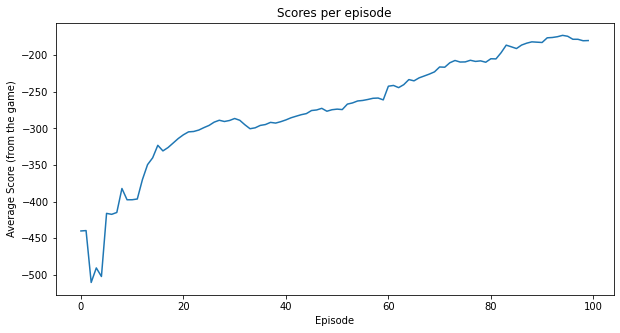

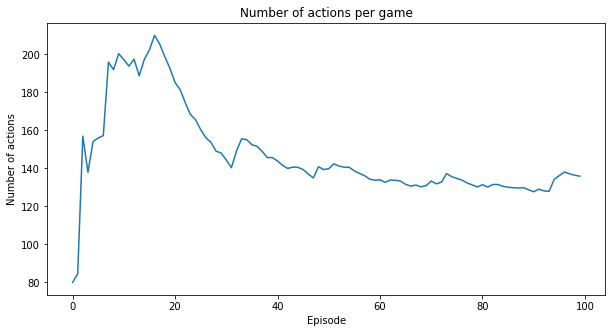

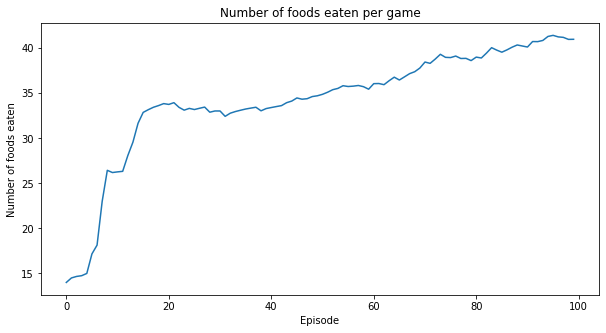

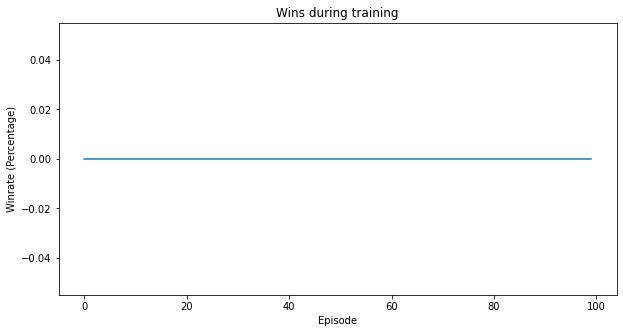

In [9]:
plot_training_data(env)